<a href="https://colab.research.google.com/github/heejjj/Sleeping_Project/blob/main/SJ_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
target = pd.read_csv('/content/drive/MyDrive/KDT_project/HACKATHON/data/target.csv')
target = target.drop('Unnamed: 0', axis=1)
target   

,2023-02-21 00:00:00,2023-02-21 00:01:00,2023-02-21 00:02:00,2023-02-21 00:03:00,2023-02-21 00:04:00,2023-02-21 00:05:00,2023-02-21 00:06:00,2023-02-21 00:07:00,2023-02-21 00:08:00,2023-02-21 00:09:00,...,2023-05-03 07:16:00,2023-05-03 07:17:00,2023-05-03 07:18:00,2023-05-03 07:19:00,2023-05-03 07:20:00,2023-05-03 07:21:00,2023-05-03 07:22:00,2023-05-03 07:23:00,2023-05-03 07:24:00,2023-05-03 07:25:00
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Reuters_dataset

In [4]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils 

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
     

In [5]:
#Set seed value

seed = 0 
numpy.random.seed(seed)
tf.random.set_seed(3)

In [106]:
#Split dataset to Train & Test

(X_train, y_train),(X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)
#num_words = 1000: Load data with a frequency of 1-1000 only

In [107]:
#Check data
category = numpy.max(y_train) +1 
print(category, 'category')
print(len(X_train), 'News articls for train')
print(len(X_test), 'News articles for test')

# numbers of words in an article --> Input data has to be numerical in DL
print(X_train[0]) #tokenized data
#if the data indicates 3 -> the article has the words 3 times in this dataset

#data : 11228 news article
#article categoreis: 46

46 category
8982 News articls for train
2246 News articles for test
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:
type(X_test)

numpy.ndarray

In [10]:
print(X_train.shape, y_train.shape)

(8982,) (8982,)


In [14]:
X_train

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 2, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 2, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 2, 55, 2, 92, 617, 80, 2, 46, 905, 220, 13,

In [108]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [109]:
X_test

array([list([1, 4, 2, 2, 9, 697, 2, 111, 8, 25, 109, 29, 2, 11, 150, 244, 364, 33, 30, 30, 2, 333, 6, 2, 159, 9, 2, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 2, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 2, 966, 2, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 2, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 2, 855, 129, 783, 21, 4, 2, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 2, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]),
       list([1, 2, 283, 122, 7, 4, 89, 544, 463, 29, 798, 748, 40, 85, 306, 28, 19, 59, 11, 82, 84, 22, 10, 2, 19, 12, 11, 82, 52, 29, 283, 2, 558, 2, 265, 2, 2, 8, 2, 118, 371, 10, 2, 281, 4, 143, 2, 760, 50, 2, 225, 139, 683, 4, 48, 193, 862, 41, 967, 2, 30, 2, 36, 8, 28, 602, 19, 32, 11, 82, 5, 4, 89, 544, 463, 41, 30, 2, 13, 260, 951, 2, 8, 69, 2, 18, 82, 41, 30, 306, 2, 13, 4, 37, 38, 283, 555, 649

In [110]:
X_test.shape

(2246,)

In [111]:
X_train.shape

(8982,)

In [112]:
type(X_train[0])

list

In [62]:
len(X_train[0])

87

In [ ]:
# X는 하루 445(+1) 일마다 list를 만들어서 array에 넣어야 함.
# (445+) 1 일은 y에 넣어야 함.

In [17]:
weekday = target.T
weekday   # 22300 rows × 1 columns

,0
2023-02-21 00:00:00,1.0
2023-02-21 00:01:00,1.0
2023-02-21 00:02:00,1.0
2023-02-21 00:03:00,1.0
2023-02-21 00:04:00,1.0
...,...
2023-05-03 07:21:00,1.0
2023-05-03 07:22:00,1.0
2023-05-03 07:23:00,1.0
2023-05-03 07:24:00,1.0


In [165]:
def create_sequences(data):
    xs = []
    ys = []
    arr_x = np.array([])
    arr_y = np.array([])
    for i in range(len(data)//446 - 1):  # 50일
        x = data.iloc[446*i:(446*(i+1)-1)]
        y = data.iloc[446*(i+1)-1]

        xs = x.values.reshape(-1, )
        ys = y.values.reshape(-1, )

        arr_x = np.concatenate((arr_x, xs))
        arr_y = np.concatenate((arr_y, ys))
    return arr_x, arr_x

X, y = create_sequences(weekday)

In [166]:
X.shape, y.shape  # ((21805,), (21805,))

((21805,), (21805,))

In [167]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [168]:
X.shape, y.shape

((21805, 1), (21805, 1))

In [171]:
# 학습 : 검증 : 시험 =  8:2
train_size = int(445*(50*0.8))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [172]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(17800, 1) (4005, 1)
(17800, 1) (4005, 1)


# Model

## 'LSTM_example_with_Reuters_dataset' 코드 사용

In [173]:
#Set model

model = Sequential()

model.add(Embedding(1000,100)) #Embedding(num of words loaded, num of words per article) -> has to be the first stage of the model 
model.add(LSTM(100, activation='tanh'))  #Weighted controlled LSTM for RNN's memory values ​​(words per article, other options)
model.add(Dense(1, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 100)         100000    
                                                                 
 lstm_8 (LSTM)               (None, 100)               80400     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 180,501
Trainable params: 180,501
Non-trainable params: 0
_________________________________________________________________


In [174]:
#compile model 

model.compile(loss='categorical_crossentropy',
              optimizer ='adam',
              metrics=['accuracy'])

In [175]:
#Run model 

history = model.fit(X_train, y_train, batch_size=100, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(100, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


178/178 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.9955

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


178/178 [==============================] - 4s 10ms/step - loss: 0.0000e+00 - accuracy: 0.9955 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
178/178 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.9955 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
178/178 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.9955 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
178/178 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.9955 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
178/178 [==============================] - 2s 9ms/step - loss: 0.0000e+00 - accuracy: 0.9955 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
178/178 [==============================] - 2s 13ms/step - loss: 0.0000e+00 - accuracy: 0.9955 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
178/178 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.9955 - val

In [176]:
#model accuracy 

print('\ Test Acuuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

126/126 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
\ Test Acuuracy: 1.0000


In [177]:
# error of test_set
y_vloss = history.history['val_loss']
y_vloss

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [178]:
#error of train set
y_loss = history.history['loss']
y_loss

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

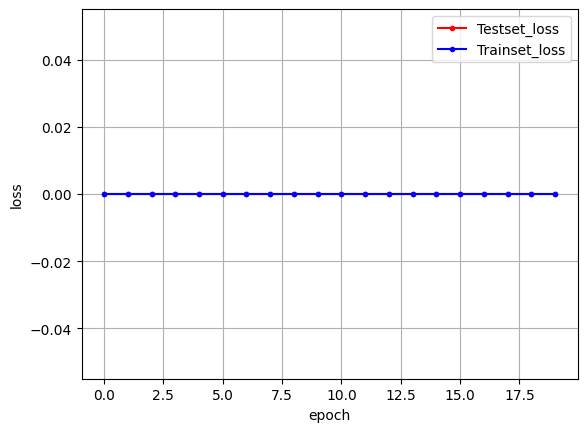

In [179]:
#graph 
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker ='.', c='red', label ='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label = 'Trainset_loss')

plt.legend(loc ='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#Model accuracy: 70.48%
#Optimal learning time just before overfitting.